In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import os
import zipfile
'''
local_zip = '/content/gdrive/My Drive/Dockship/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()
'''

"\nlocal_zip = '/content/gdrive/My Drive/Dockship/dataset.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\n\nzip_ref.extractall('/tmp')\nzip_ref.close()\n"

In [3]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
import tensorflow as tf
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,AveragePooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [4]:
data_train = '/content/gdrive/My Drive/emo'

In [5]:
imagepaths = list(paths.list_images(data_train))
random.shuffle(imagepaths)
random.seed(42)
data_images = []
labels = []
for imgpath in imagepaths:
	label = imgpath.split(os.path.sep)[-2]
	img = load_img(imgpath, target_size=(32, 32))
	data_images.append(img_to_array(img)/255.)
	labels.append(label) 

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
labels_z = lb.fit_transform(np.array(labels))
labels_value = to_categorical(labels_z,num_classes=6)
data = np.array(data_images,dtype='float32')

In [14]:
trainX, testX,trainY, testY = train_test_split(data, labels_value,test_size=0.2, random_state=42,shuffle = True)

In [8]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.1))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'));return model

mobile = define_model()

In [18]:
op_layer = mobile.output
final_layer = Dense(128,activation='relu',kernel_initializer='he_uniform')(op_layer)
final_layer = Dense(128,activation='relu',kernel_initializer='he_uniform')(final_layer)
final_layer = Dense(6,activation= 'softmax')(final_layer)
from keras.models  import Model
# Define model input and output
model = Model(inputs = mobile.input , outputs = final_layer)
opt = SGD(lr=0.01, momentum=0.9)
import keras
optimizer_sgd = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
'''
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# define model
cnn = define_model()
'''

In [9]:
# plot diagnostic learning curves
import matplotlib.pyplot as plt
def summarize_diagnostics(hist):
	plt.plot(hist.history["accuracy"])
	plt.plot(hist.history['val_accuracy'])
	plt.plot(hist.history['loss'])
	plt.plot(hist.history['val_loss'])
	plt.title("model accuracy")
	plt.ylabel("Accuracy")
	plt.xlabel("Epoch")
	plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
	plt.show()

Epoch 1/100
53/53 [==============================] - 1s 19ms/step - loss: 0.1396 - accuracy: 0.9527 - val_loss: 6.4150 - val_accuracy: 0.4107
Epoch 2/100
53/53 [==============================] - 1s 18ms/step - loss: 0.0975 - accuracy: 0.9669 - val_loss: 3.2035 - val_accuracy: 0.5104
Epoch 3/100
53/53 [==============================] - 1s 19ms/step - loss: 0.0936 - accuracy: 0.9686 - val_loss: 2.1054 - val_accuracy: 0.6218
Epoch 4/100
53/53 [==============================] - 1s 19ms/step - loss: 0.0746 - accuracy: 0.9710 - val_loss: 2.0727 - val_accuracy: 0.6009
Epoch 5/100
53/53 [==============================] - 1s 19ms/step - loss: 0.0631 - accuracy: 0.9811 - val_loss: 2.1734 - val_accuracy: 0.6241
Epoch 6/100
53/53 [==============================] - 1s 20ms/step - loss: 0.0748 - accuracy: 0.9763 - val_loss: 2.3021 - val_accuracy: 0.6218
Epoch 7/100
53/53 [==============================] - 1s 19ms/step - loss: 0.0720 - accuracy: 0.9781 - val_loss: 2.0899 - val_accuracy: 0.6404
Epoch 

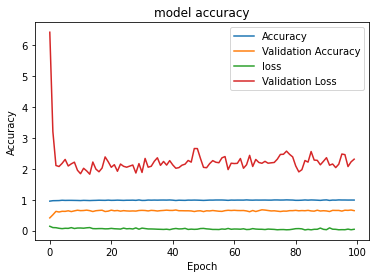

In [22]:
# run the test harness for evaluating a model
def run_test_harness():
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,zoom_range=0.1)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=32)
	# fit model
	steps = int(trainX.shape[0] / 32)
	hist = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(hist)

# entry point, run the test harness
run_test_harness()

In [ ]:
model.save('/content/gdrive/My Drive/Dockship/model4.h5')

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(testX)
y_p = np.argmax(y_pred,axis=1)
y_true = np.argmax(testY,axis=1)
print(confusion_matrix(y_true,y_p))
print('Classification report')
print(classification_report(y_true,y_p))

[[34  1  0  0  0  0]
 [ 1 46 24 20  4  0]
 [ 0 11 41  8  7  0]
 [ 0 23 14 42 12  0]
 [ 0  9 12  7 25  0]
 [ 0  0  0  0  0 90]]
Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.51      0.48      0.50        95
           2       0.45      0.61      0.52        67
           3       0.55      0.46      0.50        91
           4       0.52      0.47      0.50        53
           5       1.00      1.00      1.00        90

    accuracy                           0.65       431
   macro avg       0.67      0.67      0.66       431
weighted avg       0.65      0.65      0.64       431



In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
model_new = Model(inputs = model.input,outputs = op_layer)
train_new = sc.fit_transform(model_new.predict(trainX))
test_new = sc.fit_transform(model_new.predict(testX))
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(train_new,np.argmax(trainY,axis=1))
svm.score(train_new,np.argmax(trainY,axis=1))

0.9953542392566783

In [26]:
svm.score(test_new,np.argmax(testY,axis=1))

0.642691415313225

In [27]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(train_new,np.argmax(trainY,axis=1))
xg.score(train_new,np.argmax(trainY,axis=1))

1.0

In [28]:
xg.score(test_new,np.argmax(testY,axis=1))

0.6380510440835266

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/Dockship/model4.h5',compile = True)